# Explore the Concrete dataset 

## Import and preprocess the Concrete dataset 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('Concrete_Data.xls')
print(df.columns.values)

['Cement (component 1)(kg in a m^3 mixture)'
 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)'
 'Fly Ash (component 3)(kg in a m^3 mixture)'
 'Water  (component 4)(kg in a m^3 mixture)'
 'Superplasticizer (component 5)(kg in a m^3 mixture)'
 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)'
 'Fine Aggregate (component 7)(kg in a m^3 mixture)' 'Age (day)'
 'Concrete compressive strength(MPa, megapascals) ']


In [3]:
df_cols=['Cement [kg/m^3]', # get column names for indexing later
         'Blast Furnace Slag [kg/m^3]',
         'Fly Ash [kg/m^3]',
         'Water [kg/m^3]',
         'Superplasticizer [kg/m^3]',
         'Coarse Aggregate [kg/m^3]',
         'Fine Aggregate [kg/m^3]',
         'Age [day]',
         'Compressive Strength [MPa]']
df.columns = df_cols

## Visualize input data distribution as histogram

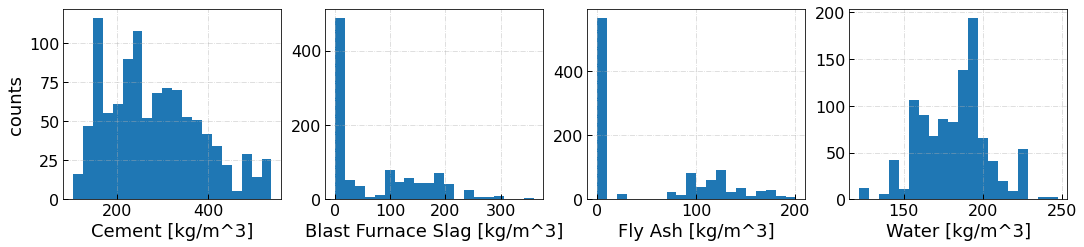

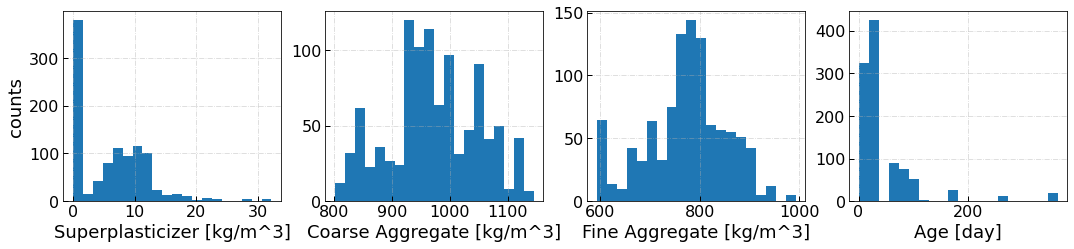

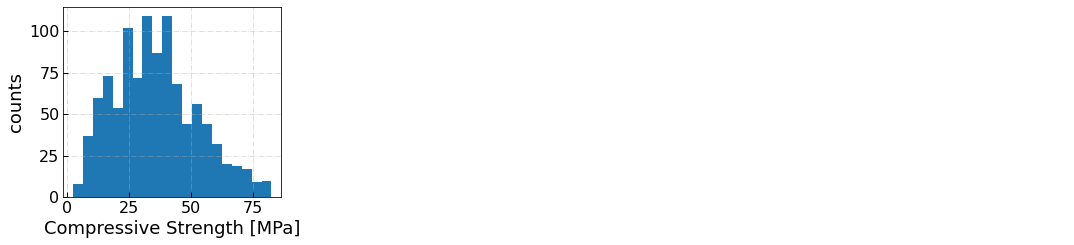

In [4]:
n_col = 4 # num of columns per row in the figure

for n in np.arange(0, 12, n_col):
    fig,axes = plt.subplots(1, n_col, figsize=(18, 3.5), sharey = False)
    fs = 20
    for i in np.arange(n_col):
        if n< len(df_cols):
            axes[i].hist(df.iloc[:,n], bins = 20)
            axes[i].set_xlabel(df_cols[n], fontsize = 18)
        else:
            axes[i].axis("off")
        n = n+1      
    axes[0].set_ylabel('counts', fontsize = 18)
    for i in range(len(axes)):
        axes[i].tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
        axes[i].grid(True, linestyle='-.')
    plt.show()

## Visualize the marginalized dependence as scatter plot

The color is for variable Age [day] with red as the highest and blue as the lowest


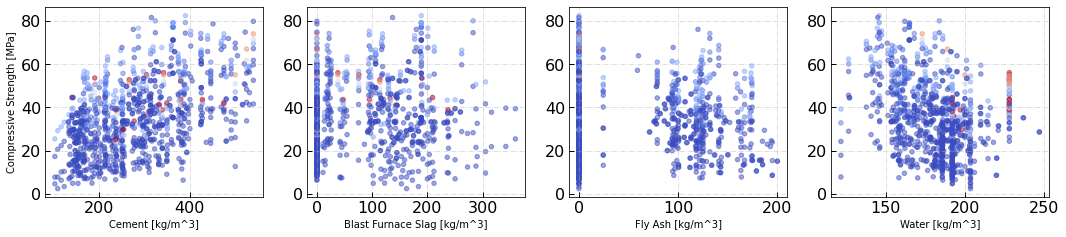

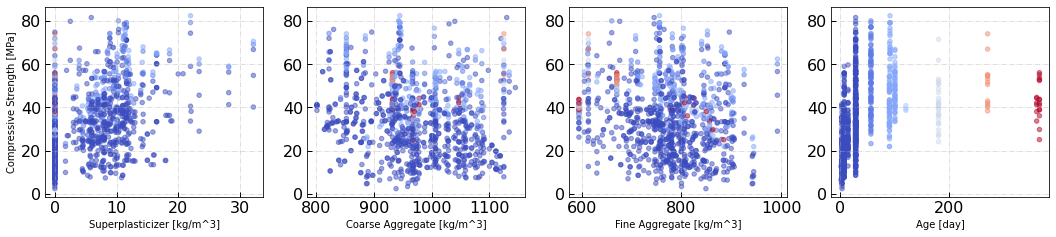

In [5]:
n_col = 4 # num of columns per row in the figure
y_indx = -1 #Compressive Strength [MPa] # Choose which column is the response variable 
color_indx = -2 #Age [days] # Choose which column is shown as the superimposed color
column_names = df.columns.values

cmap = plt.get_cmap('coolwarm', 10)
print("The color is for variable", column_names[color_indx], "with red as the highest and blue as the lowest")

for n in np.arange(0, 8, n_col):
        fig,axes = plt.subplots(1, n_col, figsize=(18, 3.5), sharey = False)
        for i in np.arange(n_col):
            #print(n)
            if n< len(column_names)-1:
                im = axes[i].scatter(df.iloc[:,n],df.iloc[:,y_indx], 
                                     c=df.iloc[:,color_indx], s = 20, cmap=cmap, alpha =0.5, edgecolors = 'face')
                axes[i].set_xlabel(column_names[n])
            else:
                axes[i].axis("off")
                #axes[i].set_title(sf_cols[n])
            n = n+1      
        axes[0].set_ylabel(column_names[y_indx])
        for i in range(len(axes)):
            axes[i].tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
            axes[i].grid(True, linestyle='-.')
        plt.show()

## Correlation Matrix Visualized as Heatmap

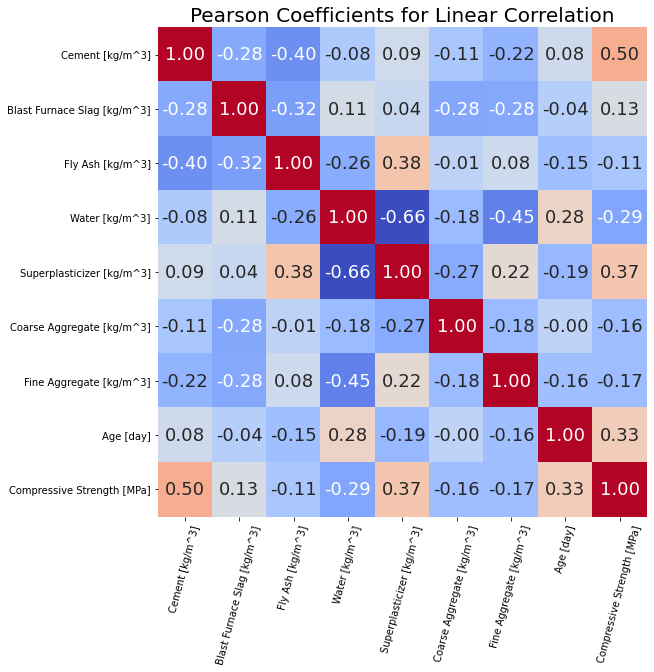

In [6]:
corr = df.corr(method='pearson')#'spearman'
corr.columns = df_cols
df_len = len(df_cols)

fig, ax=plt.subplots(figsize=(df_len,df_len))
sns.set(font_scale=1.5)
sns.set_style("ticks",{'xtick.direction': 'in', # set the style of the plot using seaborn
                       'ytick.direction':'in',
                       'xtick.top': False,'ytick.right': False})
mask = np.triu(np.ones_like(corr, dtype=np.bool))
cmap = plt.get_cmap('coolwarm')
sns.heatmap(corr, mask = None, cbar_kws={"shrink": .2}, annot=True, fmt='.2f', 
            cmap=cmap, cbar=False, ax=ax, square=True)
ax.set_xlim(0, df_len)
ax.set_ylim(df_len, 0)
ax.set_title("Pearson Coefficients for Linear Correlation", fontsize = 20)
plt.xticks(rotation=75)
plt.yticks(rotation=0) 
plt.show()